# Assignment Week 3 - "Large" Datasets and Data Augmentation

## Task 1

1. Download the ["Fast Food Classification Dataset - V2"](https://www.kaggle.com/datasets/utkarshsaxenadn/fast-food-classification-dataset/data) from Kaggle.

2. Unzip and ensure that the dataset in Colab is structured as follows:

```
|
|-- Fast Food Classification V2
|   |-- TFRecords
|   |-- Test
|   |-- Train
|   `-- Valid
|-- sample_data
`-- archive.zip
```

`Fast Food Classification V2` and `archive.zip` should be on the same level as the already existing `sample_data` directory from Colab. You can ignore the `TFRecords` subdirectory in the following tasks.

In [ ]:
#!/bin/bash
!curl -L -o archive.zip https://www.kaggle.com/api/v1/datasets/download/utkarshsaxenadn/fast-food-classification-dataset

In [1]:
!unzip -q ./datasets/fast_food/archive.zip

## Task 2

1. Define the directory paths for training, validation, and test datasets.

2. Apply the provided `delete_invalid_images` function to check and remove any corrupted or invalid images in each of the three dataset directories.

In [4]:
TRAINING_DIR = "./datasets/fast_food/Fast Food Classification V2/Train"
VALIDATION_DIR = "./datasets/fast_food/Fast Food Classification V2/Valid"
TEST_DIR = "./datasets/fast_food/Fast Food Classification V2/Test"

In [5]:
import os
from PIL import Image

# Define the paths to the directories
directories = [
    TRAINING_DIR,
    VALIDATION_DIR,
    TEST_DIR
]

# Define supported image file extensions
supported_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp'}

def delete_invalid_images(directory):
    """Goes through a directory and deletes any invalid or unsupported images."""
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            # Check if the file has a supported extension
            if not any(file.lower().endswith(ext) for ext in supported_extensions):
                print(f"Deleting unsupported file: {file_path}")
                os.remove(file_path)
                continue

            try:
                with Image.open(file_path) as img:
                    img.load()  # Ensure the image content can be read
                    if img.format not in ["JPEG", "PNG", "GIF", "BMP"]:
                        raise IOError("Unsupported image format")
            except (IOError, SyntaxError, AttributeError) as e:
                print(f"Deleting invalid or corrupted image: {file_path}")
                os.remove(file_path)

# Run the function for each directory
for dir_path in directories:
    delete_invalid_images(dir_path)

print("Invalid and unsupported image cleanup completed.")

Deleting invalid or corrupted image: ./datasets/fast_food/Fast Food Classification V2/Train/Hot Dog/Hot Dog - Train (59).jpg
Invalid and unsupported image cleanup completed.


# Task 3

1. Implement a function that visualizes 3 random examples per class from the training data to get a feel for the dataset.

2. Run the function multiple times to get different images from the dataset.

Tip: You can use whatever Python packages you like. `opencv` and `matplotlib` might be suitable choices.

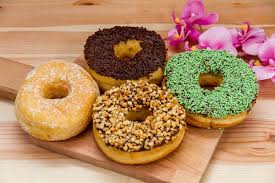

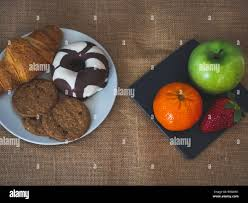

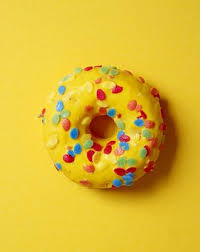

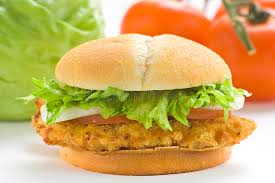

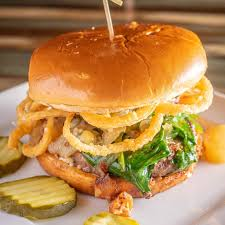

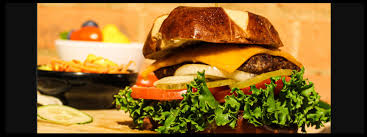

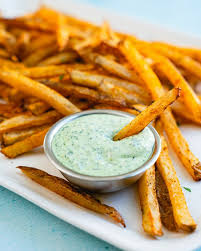

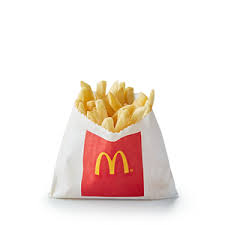

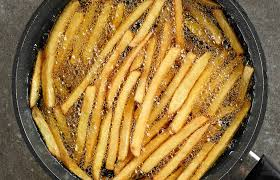

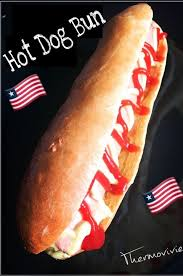

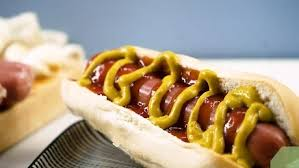

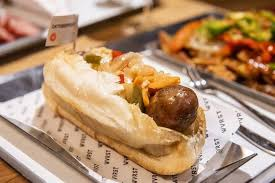

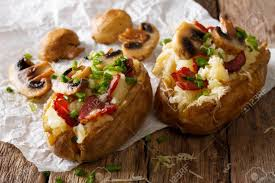

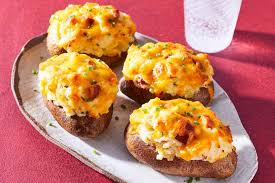

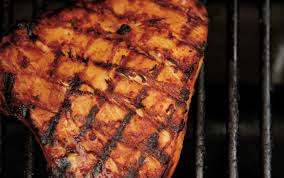

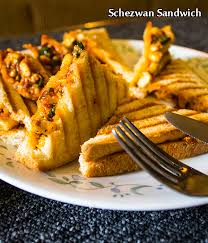

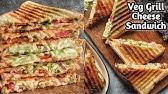

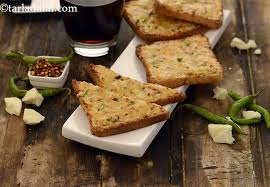

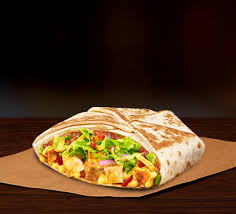

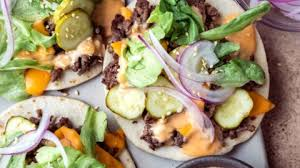

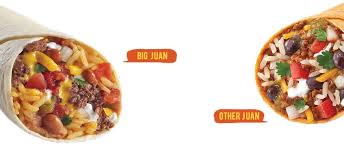

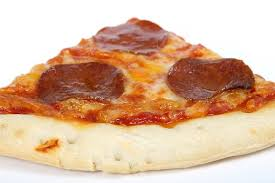

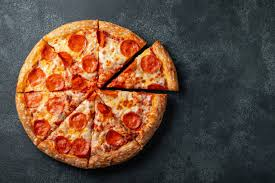

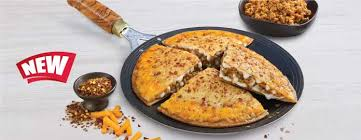

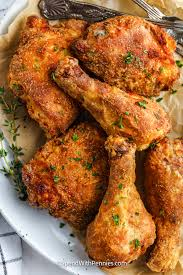

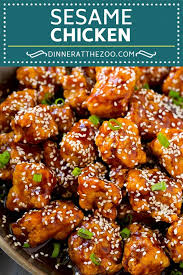

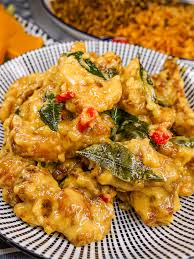

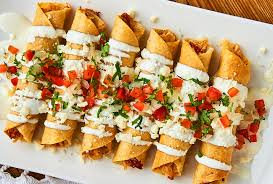

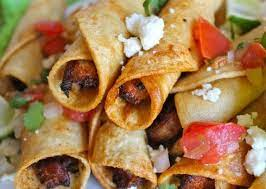

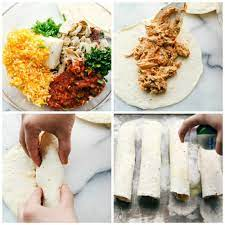

In [7]:
import os
import random

def visualize_random_images(directory_path, num_images=3):
    image_files = [image_file for image_file in os.listdir(directory_path)]

    if len(image_files) == 0:
        print(f"No images found in {directory_path}")
        return
    if len(image_files) < num_images:
        num_images = len(image_files)
    image_files = random.sample(image_files, num_images)
    for image_file in image_files:
        image_path = os.path.join(directory_path, image_file)
        try:
            with Image.open(image_path) as img:
                img.show(title=image_file)
        except Exception as e:
            print(f"Error displaying image {image_file}: {e}")

    pass


    # YOUR CODE ENDS HERE

class_directory_paths = os.listdir(TRAINING_DIR)

for class_directory_path in class_directory_paths:
  visualize_random_images(TRAINING_DIR + "/" + class_directory_path)

In [8]:
#get the number if images in each class
import os

# Path to the training directory
TRAINING_DIR = "./datasets/fast_food/Fast Food Classification V2/Train"

# Count the number of images in each subfolder (class)
def count_images_in_subfolders(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
    return class_counts

# Get the counts for the training directory
image_counts = count_images_in_subfolders(TRAINING_DIR)

# Print the counts
for class_name, count in image_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class 'Donut' has 1500 images.
Class 'Burger' has 1500 images.
Class 'Fries' has 1500 images.
Class 'Hot Dog' has 1499 images.
Class 'Baked Potato' has 1500 images.
Class 'Sandwich' has 1500 images.
Class 'Taco' has 1500 images.
Class 'Pizza' has 1500 images.
Class 'Crispy Chicken' has 1500 images.
Class 'Taquito' has 1500 images.


# Task 4

1. Choose an appropriate image size for the input images for an image classification task and set the values of the predefined constants `IMAGE_HEIGHT` and `IMAGE_WIDTH`.

2. Load the training, validation and test datasets using the `image_dataset_from_directory` function shown in the Coursera course. Specifically, set appropriate values for `label_mode`, `batch_size`, `image_size` and `shuffle`. Each dataset should get a fixed `seed` of `123`.
Checkout the documentation for details:
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

3. Briefly explain for which of the training, validation and test datasets might be important to shuffle the data and why this is important.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 64
IMAGE_HEIGHT = None # TODO: Choose an appropriate image height
IMAGE_WIDTH = None # TODO: Choose an appropriate image width

In [ ]:
train_images = None # TODO: Load the training dataset from the corresponding directory

validation_images = None # TODO: Load the validation dataset from the corresponding directory

test_images = None # TODO: Load the test dataset from the corresponding directory

**Expected output:**  
Found 14999 images belonging to 10 classes.  
Found 3500 images belonging to 10 classes.  
Found 1500 images belonging to 10 classes.  

# Task 5

In this exercise you will be given a predefined model architecture (except for the data augmentation layers) that you should train using the data with and without the application of data augmentation and compare the results of the different models.

1. Train the model without data augmentation for at least 30 epochs. Save a screenshot of the resulting accuracy and loss plots and judge the quality of the model. Also note the loss and accuracy of the model on the test set.

2. Train the model again, this time using data augmentation for the same number of epochs as the previous model. Choose 2 to 3 data augmentation techniques (other than rescaling) that might be suitable for the given dataset, and briefly explain why. Compare the training and model quality of the two models.

Take a look at this tutorial for an overview of (some) data augmentation techniques:
https://www.tensorflow.org/tutorials/images/data_augmentation

In [ ]:
# TODO: Add data augmentation layers
data_augmentation_layers = tf.keras.Sequential([

])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    tf.keras.layers.Rescaling(1/255),
    # data_augmentation_layers,
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [ ]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images,
                    validation_data=validation_images,
                    epochs=30)

In [ ]:
import matplotlib.pyplot as plt

# Plot the model training history
def plot_training_history(history):
    # Extracting accuracy and loss from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Setting up the number of epochs for the x-axis
    epochs_range = range(1, len(acc) + 1)

    # Plotting training and validation accuracy
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plotting training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [ ]:
# Calculate loss and accuracy on the test set
test_loss, test_acc = model.evaluate(test_images)
print(f"Test Accuracy: {test_acc} | Test Loss: {test_loss}")